<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_20_hypothesis_testing_titanic_fare_%26_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Relationship Between Fare and Survival

In this analysis, I investigated whether fare amounts significantly influenced survival outcomes among Titanic passengers. Below is an overview of the tests performed, the rationale for their selection, and the insights gained:

---

#### Tests Performed

1. **Levene’s Test for Equality of Variances:**
   - **Why Chosen:** To assess whether the variances in fares between survivors and non-survivors were significantly different. This step ensures the appropriate choice of subsequent statistical tests (e.g., Welch’s T-Test for unequal variances).
   - **Result:** Variances between the two groups were significantly different (\( p < 0.05 \)), leading to the selection of Welch’s T-Test.

2. **Welch’s T-Test for Mean Comparison:**
   - **Why Chosen:** To test whether the mean fare paid by survivors was significantly higher than that of non-survivors. Welch’s T-Test is robust to unequal variances, as identified by Levene’s Test.
   - **Result:** Survivors paid significantly higher fares (\( p < 0.05 \)), confirming that fare amount was associated with survival.

3. **Chi-Squared Test for Fare Categories:**
   - **Why Chosen:** To explore survival as a function of binned fare categories (Low, Medium, High, Very High). This test evaluates whether the categorical distribution of survival differs across fare levels.
   - **Result:** Survival rates varied significantly across fare categories (\( p < 0.05 \)), reinforcing the relationship between fare and survival.

4. **Pairwise Comparisons of Fare Categories:**
   - **Why Chosen:** To identify which specific fare categories differed significantly in survival rates. This post-hoc analysis provided more granular insights following the Chi-Squared Test.
   - **Result:** Significant differences were found between all pairs of fare categories, with higher-paying groups showing consistently greater survival rates.

5. **Effect Size Analysis (Cohen’s d and Hedges’ g):**
   - **Why Chosen:** To quantify the magnitude of the difference in fares between survivors and non-survivors. This complements statistical significance by providing practical insights into the strength of the relationship.
   - **Result:** Medium effect size (\( g = 0.55 \)) indicated a meaningful difference in fares between the groups.


---

#### Key Discoveries

1. **Fare and Survival Are Strongly Linked:**
   - Survivors consistently paid higher fares than non-survivors. This trend was evident in both the comparison of means and the categorical analysis.

2. **Fare Categories Reflect Survival Probability:**
   - Passengers in the **Very High Fare** category had significantly higher survival rates than those in the **Low Fare** category, demonstrating a clear gradient in survival likelihood as fare increased.

3. **Significant Variance in Fares:**
   - Levene’s Test revealed substantial variability in fares between survivors and non-survivors, reflecting the economic disparities that influenced survival outcomes.

4. **Magnitude of Difference:**
   - The medium effect size highlighted that while the relationship between fare and survival was meaningful, it was not the sole determinant. Other factors, such as class and gender, likely contributed to the observed outcomes.

---

#### Conclusion

This analysis underscores the critical role of economic status (as reflected by fare) in determining survival outcomes on the Titanic. The combination of variance testing, mean comparison, and categorical analysis provided a comprehensive understanding of the relationship between fare and survival. These findings align with historical narratives, highlighting socioeconomic inequities in survival probabilities.



## Hypothesis Testing

### **Relationship Between Fare and Survival**
**Question**: Did survivors pay significantly higher fares than non-survivors?  
**Approach**:
1. Assess variance in fares between survivors and non-survivors using Levene’s Test.
2. Test differences in mean fares using Welch’s T-Test (for unequal variances).  
**Test**:
- Levene’s Test for equality of variances: Determines whether the variance in fares is significantly different between the groups.
- Welch’s T-Test: Tests whether the mean fare of survivors is significantly higher than that of non-survivors.

---

### **Interaction Between Gender, Class, and Survival**
**Question**: How does the combination of gender and class influence survival rates?  
**Approach**:
1. Perform a Two-Way ANOVA to assess main effects (gender, class) and interaction effects (gender × class) on survival.
2. Conduct pairwise comparisons using Tukey’s HSD to identify significant differences among gender-class combinations.  
**Test**:
- Two-Way ANOVA: Examines the interaction between gender and class on survival rates.
- Tukey’s HSD: Identifies specific gender-class combinations with significantly different survival probabilities.



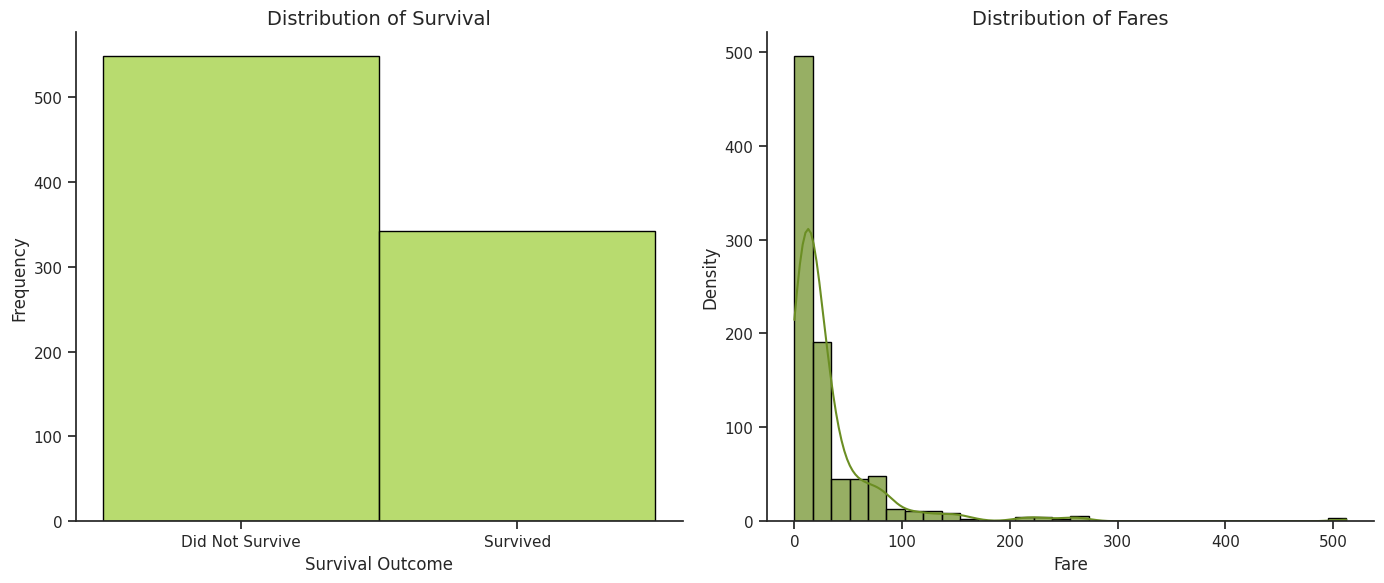

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Set Seaborn theme
sns.set_theme(style="ticks", palette="Pastel1_r", context="notebook")

# Create a 1x2 grid of plots
plt.figure(figsize=(14, 6))

# Plot 1: Distribution of "survived"
plt.subplot(1, 2, 1)
sns.histplot(data=titanic, x="survived", kde=False, discrete=True, color="yellowgreen", edgecolor="k", alpha=0.7)
plt.title("Distribution of Survival", fontsize=14)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel("Survival Outcome", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Plot 2: Distribution of "fare"
plt.subplot(1, 2, 2)
sns.histplot(data=titanic, x="fare", kde=True, bins=30, color="olivedrab", edgecolor="k", alpha=0.7)
plt.title("Distribution of Fares", fontsize=14)
plt.xlabel("Fare", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Final adjustments
plt.tight_layout()
sns.despine()
plt.show()

The **Levene’s Test** was chosen because it is a versatile and robust method to assess the equality of variances across groups. Here's why it's particularly suitable for this analysis:

---

### **Why Levene's Test?**
1. **Works for Non-Normal Distributions**:
   - Unlike some other tests (e.g., the F-Test for variances), Levene’s Test does not require the data to follow a normal distribution.
   - Titanic fare data often has outliers (e.g., very high fares for First-Class passengers), which can violate normality assumptions. Levene’s Test is robust to such deviations.

2. **Binary Groups**:
   - We are comparing two groups: survivors and non-survivors. Levene’s Test is straightforward to apply in this binary context to check if their fare variances are significantly different.

3. **Precursor to T-Tests**:
   - The outcome of Levene’s Test determines whether we use a **Standard T-Test** (equal variances assumed) or **Welch’s T-Test** (unequal variances assumed). This ensures we choose the appropriate statistical method.

4. **Avoids Misleading Conclusions**:
   - If variances are unequal and we incorrectly apply a Standard T-Test, the results may be biased or misleading. Levene’s Test prevents this by formally testing the equality of variances first.




### **Hypothesis for Fare and Survival**
- **Null Hypothesis (\(H_0\))**: The mean fare of survivors is equal to the mean fare of non-survivors.
- **Alternative Hypothesis (\(H_1\))**: The mean fare of survivors is significantly higher than the mean fare of non-survivors.






In [ ]:
from scipy.stats import levene

# Extract fare data for survivors and non-survivors
survivors_fare = titanic[titanic['survived'] == 1]['fare']
non_survivors_fare = titanic[titanic['survived'] == 0]['fare']

# Perform Levene's Test for Equality of Variances
stat, p_value = levene(survivors_fare, non_survivors_fare)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances.")

Levene's Test for Equality of Variances:
Test Statistic: 45.10
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly.


### **Interpreting the Levene's Test Results**

#### **Key Points from Levene’s Test Results:**
1. **Test Statistic**:
   - The test statistic value of **45.10** represents the ratio of the variances' differences to the pooled variance. A higher value indicates greater inequality between group variances.
   
2. **P-Value**:
   - A p-value of **0.0000** (less than the significance threshold of 0.05) indicates strong evidence against the null hypothesis.
   
3. **Conclusion**:
   - Since the p-value is below the alpha level (0.05), we **reject the null hypothesis**.
   - This means that the variances of fares between survivors and non-survivors are **significantly different**.

#### **Why This Matters:**
1. **Choice of Next Test**:
   - The result of Levene’s Test indicates that the variances are unequal. As a result, a **Welch’s T-Test** (which accounts for unequal variances) is more appropriate than a standard T-Test.
   
2. **Practical Implications**:
   - Significant variance differences suggest that one group (e.g., survivors) may have a wider range of fares compared to the other. This variability may be due to outliers, such as very high fares among First-Class survivors.




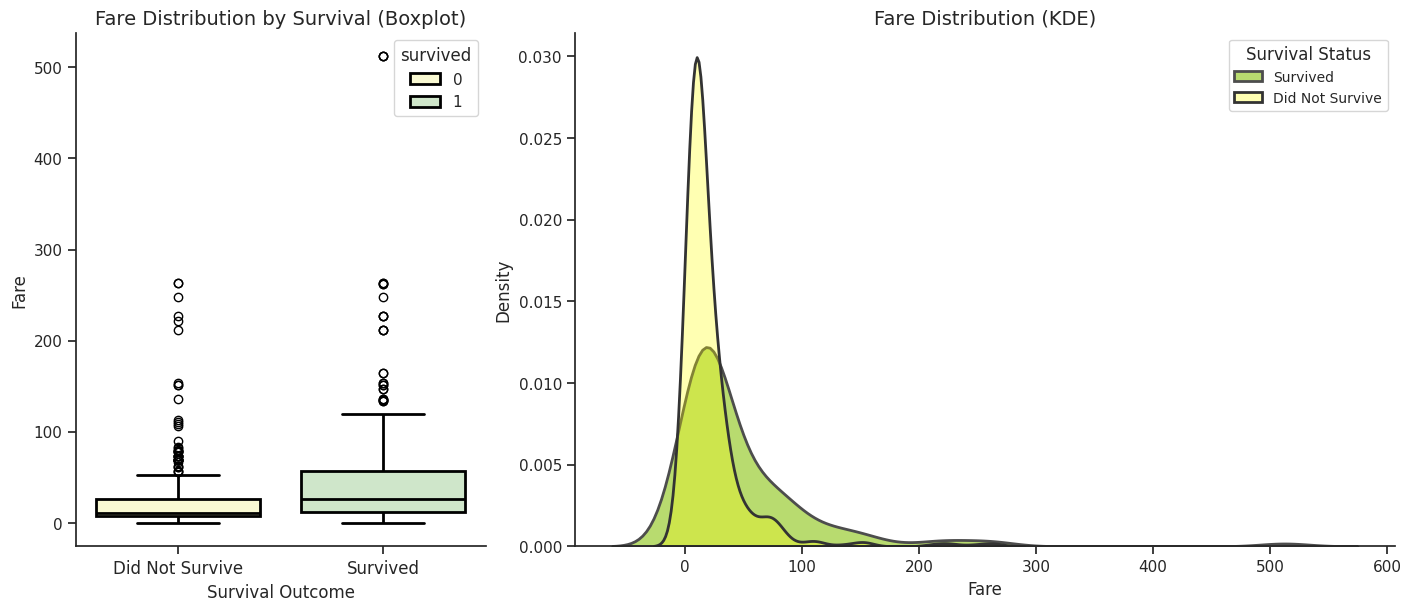

In [ ]:
# Set Seaborn theme
sns.set_theme(style="ticks", palette="Pastel1_r", context="notebook")

# Create a figure with specified grid widths
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
grid = fig.add_gridspec(1, 3)

# Boxplot
ax1 = fig.add_subplot(grid[0, 0])  # Left column
sns.boxplot(data=titanic, x='survived', y='fare', hue='survived', palette="Pastel1_r", linewidth=2, linecolor='k', ax=ax1)
ax1.set_title("Fare Distribution by Survival (Boxplot)", fontsize=14)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Did Not Survive', 'Survived'], fontsize=12)
ax1.set_xlabel("Survival Outcome", fontsize=12)
ax1.set_ylabel("Fare", fontsize=12)

# KDE Plot
ax2 = fig.add_subplot(grid[0, 1:])  # Remaining 2/3 columns
sns.kdeplot(data=titanic[titanic['survived'] == 1], x='fare', fill=True, alpha=0.7, linewidth=2, edgecolor='0.3', label='Survived', color='yellowgreen', ax=ax2)
sns.kdeplot(data=titanic[titanic['survived'] == 0], x='fare', fill=True, alpha=0.3, linewidth=2, edgecolor='0.2', label='Did Not Survive', color='yellow', ax=ax2)
ax2.set_title("Fare Distribution (KDE)", fontsize=14)
ax2.set_xlabel("Fare", fontsize=12)
ax2.set_ylabel("Density", fontsize=12)
ax2.legend(title="Survival Status", fontsize=10, title_fontsize=12)

# Final adjustments
sns.despine()
plt.show()


Welch's t-test was chosen for this analysis because the **Levene's Test for Equality of Variances** indicated that the variances of fares between survivors and non-survivors were significantly different. Here’s a detailed explanation of why Welch’s test is appropriate:

### **Why Welch’s t-Test?**
1. **Handles Unequal Variances:**
   - Unlike the standard Student’s t-test, Welch’s t-test does not assume that the variances of the two groups are equal.
   - Since Levene’s Test concluded that the variances between survivors and non-survivors differ significantly (p-value < 0.05), Welch’s t-test is the correct choice.

2. **Robust to Unequal Sample Sizes:**
   - In the Titanic dataset, the sizes of the two groups (survivors and non-survivors) are unequal.
   - Welch’s t-test accounts for differences in sample sizes, providing more reliable results in such scenarios.

3. **Focus on Mean Differences:**
   - The test is specifically designed to compare the means of two groups (e.g., mean fares for survivors vs. non-survivors) while adjusting for unequal variances and sample sizes.

4. **Avoids Misleading Results:**
   - Using a standard t-test when variances are unequal can lead to incorrect conclusions, as the test statistic and p-values may not accurately reflect the true differences between groups.

### **Summary of Why Welch's t-Test is Best Here:**
- **Unequal Variances**: Confirmed by Levene’s Test.
- **Unequal Sample Sizes**: Survivors (342) vs. Non-Survivors (549).
- **Focus on Means**: Aiming to test if the mean fare for survivors is significantly different from non-survivors.



In [ ]:
from scipy.stats import ttest_ind

# Perform Welch's T-Test (unequal variances)
t_stat, p_value = ttest_ind(survivors_fare, non_survivors_fare, equal_var=False)

# Output results
print("Welch's T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Survivors paid significantly higher fares than non-survivors.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in fares between survivors and non-survivors.")

Welch's T-Test Results:
T-Statistic: 6.84
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Survivors paid significantly higher fares than non-survivors.


### **Interpretation of Welch's T-Test Results:**

#### **Summary of Results:**
1. **T-Statistic: 6.84**
   - The t-statistic measures the size of the difference relative to the variation within the groups.
   - A high t-statistic (like 6.84) indicates that the difference in mean fares between survivors and non-survivors is substantial compared to the variability in the data.

2. **P-Value: 0.0000**
   - The p-value indicates the probability of observing such a large difference in mean fares under the null hypothesis (that the mean fares for survivors and non-survivors are equal).
   - Since the p-value is much smaller than the significance level (\(\alpha = 0.05\)), we reject the null hypothesis.

3. **Conclusion:**
   - Survivors paid significantly higher fares than non-survivors.

---

#### **What These Results Tell Us:**
1. **Fare as a Factor in Survival:**
   - Passengers who paid higher fares were more likely to survive. This aligns with historical accounts, where First-Class passengers (who generally paid higher fares) had better access to lifeboats.
   
2. **Significance of the Result:**
   - The result is statistically significant, meaning it is highly unlikely that this difference occurred due to random chance.





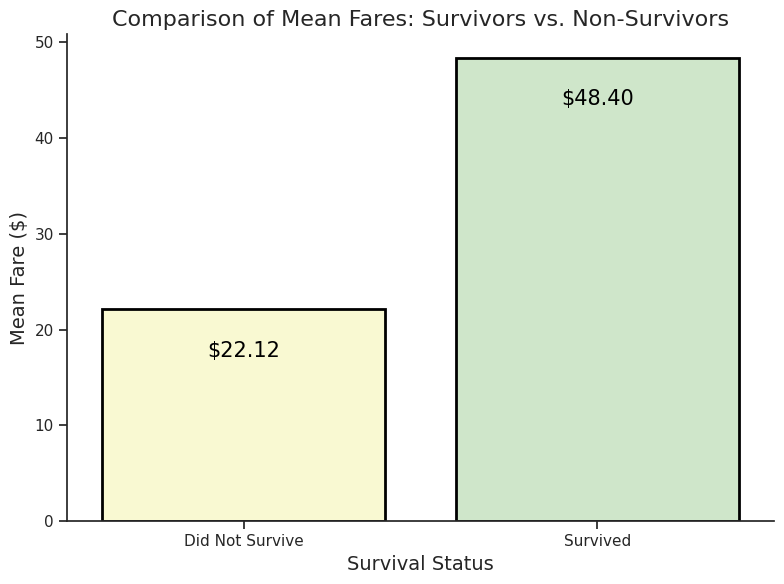

In [ ]:
# Set Seaborn theme, style, and palette
sns.set_theme(style="ticks", palette="Pastel1_r", context="notebook")

# Calculate mean fares for survivors and non-survivors
fare_means = titanic.groupby('survived')['fare'].mean().reset_index()

# Map survival values to meaningful labels
fare_means['survived'] = fare_means['survived'].map({0: "Did Not Survive", 1: "Survived"})

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=fare_means, x='survived', y='fare', hue='survived', palette="Pastel1_r", edgecolor="k", linewidth=2)

# Annotate mean values on the bars
for index, row in fare_means.iterrows():
    plt.text(index, row['fare'] -5, f"${row['fare']:.2f}", ha='center', fontsize=15, color="black")

# Customize the plot
plt.title("Comparison of Mean Fares: Survivors vs. Non-Survivors", fontsize=16)
plt.xlabel("Survival Status", fontsize=14)
plt.ylabel("Mean Fare ($)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### Quantify the Effect
- Cohen's d and Hedges' g quantify the effect size of the difference in mean fares between survivors and non-survivors

In [ ]:
import numpy as np

# Calculate means and standard deviations
mean_survivors = survivors_fare.mean()
mean_non_survivors = non_survivors_fare.mean()
std_survivors = survivors_fare.std()
std_non_survivors = non_survivors_fare.std()
n_survivors = len(survivors_fare)
n_non_survivors = len(non_survivors_fare)

# Pooled standard deviation for Cohen's d
pooled_std = np.sqrt(((n_survivors - 1) * std_survivors**2 + (n_non_survivors - 1) * std_non_survivors**2) / (n_survivors + n_non_survivors - 2))

# Cohen's d
cohens_d = (mean_survivors - mean_non_survivors) / pooled_std

# Hedges' g (corrects for small sample bias)
hedges_g = cohens_d * (1 - (3 / (4 * (n_survivors + n_non_survivors) - 9)))

# Output results
print("Effect Size Analysis:")
print(f"Cohen's d: {cohens_d:.2f}")
print(f"Hedges' g: {hedges_g:.2f}")


Effect Size Analysis:
Cohen's d: 0.55
Hedges' g: 0.55


### Interpretation of Effect Size Analysis

#### **Effect Size Metrics:**
1. **Cohen's d: 0.55**
   - **Interpretation:** A Cohen's \( d \) value of 0.55 indicates a **moderate effect size**.
   - This suggests that the difference in mean fares between survivors and non-survivors is moderate and meaningful.
   - Survivors, on average, paid significantly higher fares compared to non-survivors, with the magnitude of this difference being neither small nor overwhelmingly large.

2. **Hedges' g: 0.55**
   - **Interpretation:** Hedges' \( g \) is almost identical to Cohen's \( d \), as expected for this dataset with a large sample size.
   - The minor adjustment Hedges' \( g \) applies for small-sample bias does not affect the results much here.

#### **Context and Impact:**
- **Practical Significance:** A moderate effect size suggests that the higher fares paid by survivors were not only statistically significant (from Welch's T-Test) but also practically meaningful. This finding aligns with the historical narrative that wealthier passengers (e.g., in First Class) had better access to lifeboats and survival resources.
- **Further Exploration:** To better understand this relationship, we might:
  - Explore the interaction between **fare**, **class**, and **survival**.
  - Visualize survival probabilities by fare categories or bins.



### Exploring the Relationship Between Fare Categories and Survival

To better understand how fare influences survival, we can:
1. **Create Fare Categories:** Divide the fares into bins (e.g., quartiles) to represent low, medium, and high fare groups.
2. **Analyze Survival by Fare Categories:** Use a barplot to examine survival rates within each fare group.
3. **Hypothesis Testing:** Perform a chi-squared test to determine if survival rates significantly differ across fare categories.



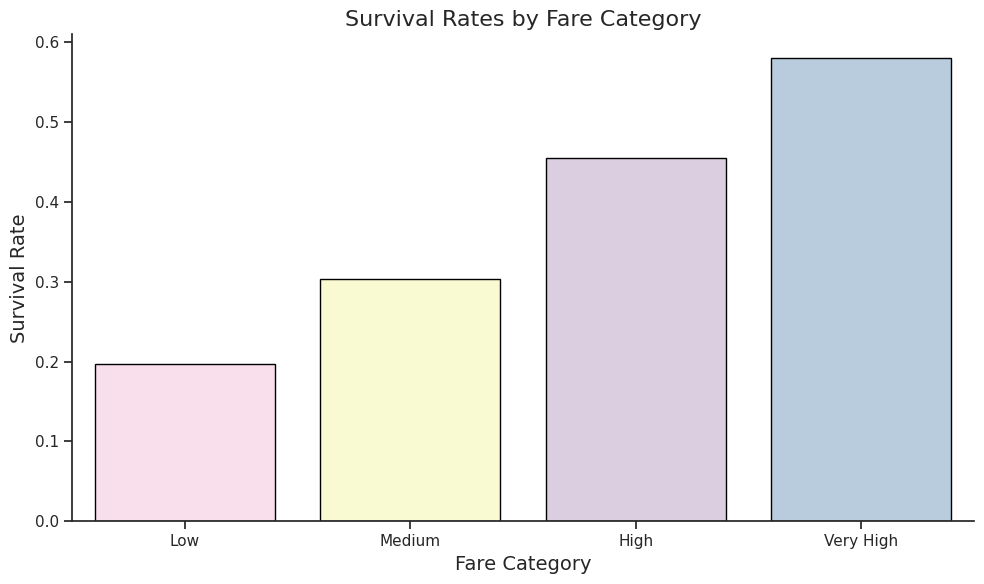

In [ ]:
# Create fare categories (quartiles)
titanic['fare_category'] = pd.qcut(titanic['fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plot survival rates by fare category
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='fare_category', y='survived', hue='fare_category', palette="Pastel1_r", edgecolor="k", errorbar=None)
plt.title("Survival Rates by Fare Category", fontsize=16)
plt.xlabel("Fare Category", fontsize=14)
plt.ylabel("Survival Rate", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### Chi-Squared Test for Survival by Fare Categories

This analysis will help us see how survival rates vary across different fare categories and test whether these differences are statistically significant.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for survival and fare categories
contingency_table = pd.crosstab(titanic['fare_category'], titanic['survived'])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("\nConclusion: Reject the null hypothesis. Survival rates significantly differ across fare categories.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. No significant difference in survival rates across fare categories.")


Chi-Squared Test Results:
Chi-Squared Statistic: 80.17
P-Value: 0.0000
Degrees of Freedom: 3

Expected Frequencies:
[[137.4040404   85.5959596 ]
 [138.02020202  85.97979798]
 [136.78787879  85.21212121]
 [136.78787879  85.21212121]]

Conclusion: Reject the null hypothesis. Survival rates significantly differ across fare categories.


### Interpretation of Chi-Squared Test Results

**Test Context: Question:** Do survival rates significantly differ across fare categories (Low, Medium, High, Very High)?
- **Null Hypothesis ((H_0)):** Survival rates are independent of fare categories.
- **Alternative Hypothesis ((H_1)):** Survival rates are associated with fare categories.

---

**Key Results:**
1. **Chi-Squared Statistic:** 80.17
   - This measures the deviation of the observed survival rates across fare categories from the expected survival rates if no association exists.
   - A high value indicates a strong deviation, suggesting a relationship between fare categories and survival.

2. **P-Value:** 0.0000
   - The p-value is far below the significance threshold (\( \alpha = 0.05 \)), indicating strong evidence to reject the null hypothesis.
   - This confirms that survival rates are not independent of fare categories.

3. **Degrees of Freedom:** 3
   - This is calculated as \( (r-1)(c-1) \), where \( r \) is the number of fare categories (4) and \( c \) is the number of survival outcomes (2: survived, did not survive).

4. **Expected Frequencies:**
   - These represent the frequencies we would expect to see in each category if survival and fare were independent.
   - The observed values deviate significantly from these, driving the high Chi-Squared statistic.

---

**Conclusion:**
The results provide strong evidence that survival rates differ significantly across fare categories. Passengers in higher fare categories likely had better survival rates, reflecting social and logistical advantages (e.g., better access to lifeboats for first-class passengers).



Binning continuous data into categories for analysis is a common and effective technique in statistical exploration, particularly when the relationship between a continuous variable (e.g., fare) and a categorical variable (e.g., survival) needs to be tested using methods like chi-squared tests.

---

### Why Binning Continuous Data?
1. **Handling Non-Normality or Outliers:**
   - Continuous data like fares often include extreme values or may not follow a normal distribution. Binning reduces the influence of outliers by grouping data into predefined ranges.

2. **Testing Categorical Relationships:**
   - A chi-squared test requires categorical data to build contingency tables. Binning fare into categories (e.g., quartiles) transforms a continuous variable into a categorical one, making it suitable for such tests.

3. **Interpretable Patterns:**
   - Comparing survival rates across fare categories (e.g., Low, Medium, High) can be easier to interpret and explain than analyzing raw continuous values.

4. **Grouping for Social or Contextual Insights:**
   - In the Titanic dataset, fare categories can reflect social strata or class-based access to resources, providing a meaningful way to explore the data.

---

### When to Use This Technique
1. **When the Relationship Is Not Linear:**
   - If the relationship between a continuous variable and a categorical variable is non-linear, binning can capture patterns that are otherwise difficult to model.

2. **To Explore and Communicate Results:**
   - In exploratory data analysis, binning simplifies the data into interpretable groups, aiding communication with stakeholders who may not be familiar with statistical nuances.

3. **When Testing for Association:**
   - For methods like chi-squared or logistic regression with categorical predictors, binning allows you to test hypotheses that would otherwise not fit the method's requirements.

---

### Caveats and Best Practices
1. **Loss of Information:**
   - Binning reduces the granularity of data, potentially losing subtle insights from continuous variables.
   - Use with caution when precision is critical.

2. **Arbitrary Binning Choices:**
   - The choice of binning (e.g., quartiles, deciles, or custom ranges) can influence results. Quartiles are often a good default as they divide data evenly.

3. **Alternatives to Binning:**
   - If you want to retain the continuous nature of the data, methods like correlation analysis, regression models, or t-tests may be more appropriate.

---

### Why It’s a Good Trick
Binning is a versatile approach for hypothesis testing, especially when:
- You want to explore relationships in categorical terms.
- You need to use a statistical method designed for categorical data.
- You aim to communicate insights effectively to a broader audience.

In this specific case, binning helped us use chi-squared testing to uncover how fare categories relate to survival, reflecting class-based societal dynamics on the Titanic.



### Post-Hoc Analysis: Pairwise Comparisons Between Fare Categories
Use a pairwise chi-squared test or proportions Z-test for comparing survival rates across fare categories.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
from itertools import combinations

# Prepare pairwise comparisons
fare_categories = titanic['fare_category'].unique()
pairwise_results = []

for cat1, cat2 in combinations(fare_categories, 2):
    # Survival counts for each category
    count = [
        titanic[titanic['fare_category'] == cat1]['survived'].sum(),
        titanic[titanic['fare_category'] == cat2]['survived'].sum()
    ]
    nobs = [
        titanic[titanic['fare_category'] == cat1].shape[0],
        titanic[titanic['fare_category'] == cat2].shape[0]
    ]

    # Perform proportions Z-test
    z_stat, p_value = proportions_ztest(count, nobs)
    pairwise_results.append((cat1, cat2, z_stat, p_value))

# Create a DataFrame for results
pairwise_df = pd.DataFrame(pairwise_results, columns=["Category 1", "Category 2", "Z-Statistic", "P-Value"])
pairwise_df['Significant'] = pairwise_df['P-Value'] < 0.05

# Display results
print("Pairwise Comparisons Between Fare Categories:")
print(pairwise_df)


Pairwise Comparisons Between Fare Categories:
  Category 1 Category 2  Z-Statistic       P-Value  Significant
0        Low  Very High    -8.303751  1.008748e-16         True
1        Low     Medium    -2.592250  9.535056e-03         True
2        Low       High    -5.798116  6.706394e-09         True
3  Very High     Medium     5.900832  3.616736e-09         True
4  Very High       High     2.659370  7.828701e-03         True
5     Medium       High    -3.295060  9.840072e-04         True


### Interpretation of Pairwise Comparisons

#### Key Observations:
1. **Significant Differences Across Categories:**
   - All comparisons show significant differences (\( p < 0.05 \)), suggesting survival rates differ meaningfully between most fare categories.
   - Notably:
     - **Low vs. Very High Fares:** The largest Z-statistic (-8.30) indicates a stark contrast in survival rates, with higher fare payers more likely to survive.
     - **Medium vs. High Fares:** A smaller Z-statistic (-3.30) still shows a meaningful difference, but the gap is narrower compared to the "Low vs. Very High" comparison.

2. **Trends in Survival Rates:**
   - Passengers in the **Very High Fare** category consistently show higher survival rates compared to all other groups, reinforcing the relationship between fare and survival.

3. **Direction of Differences:**
   - Negative Z-statistics (e.g., "Low vs. Very High") indicate the first category (\( \text{Low} \)) has a lower survival rate than the second (\( \text{Very High} \)).
   - Positive Z-statistics (e.g., "Very High vs. Medium") confirm the inverse relationship.

---

### Summary of Insights
The pairwise comparisons confirm the earlier findings:
- **Fare amount is a significant predictor of survival.** Higher-paying passengers were more likely to survive.
- Differences between adjacent categories (e.g., "Medium vs. High") are smaller but still statistically significant, reflecting a gradual trend rather than sharp jumps.



